In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '673d1889-dba4-4281-924e-afc9ed531310',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

# Notes:
# 1- I had to go in anf put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# 2- Into the Anaconda Prompt to change this to allow to pull data
# 3- if that does not work try to using the localhost URL 

{'status': {'timestamp': '2023-10-12T21:04:44.565Z', 'error_code': 0, 'error_message': None, 'elapsed': 10, 'credit_count': 1, 'notice': None, 'total_count': 8939}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10493, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd



In [4]:
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_row', None)

In [5]:
# Data demonstration   

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10493,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.951188e+07,1.951188e+07,False,NaN,1,None,None,None,2023-10-12T21:02:00.000Z,26743.570396,9.524281e+09,-29.0447,0.146069,0.116978,-2.663421,2.596252,-9.043173,-11.528774,5.218172e+11,50.0273,5.616150e+11,None,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:44.820601+00:00
1,1027,Ethereum,ETH,ethereum,7545,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202536e+08,1.202536e+08,True,NaN,2,None,None,None,2023-10-12T21:02:00.000Z,1536.062683,4.965064e+09,-8.5528,0.357858,-1.728712,-4.988689,-3.869390,-17.125949,-19.912008,1.847170e+11,17.7091,1.847170e+11,None,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:44.820601+00:00
2,825,Tether USDt,USDT,tether,63622,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.352203e+10,8.662567e+10,True,NaN,3,None,None,None,2023-10-12T21:02:00.000Z,0.999638,1.630412e+10,-17.6597,-0.014267,-0.006418,-0.066788,-0.004572,0.034394,-0.102595,8.349179e+10,8.0028,8.659430e+10,None,2023-10-12T21:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-12 21:04:44.820601+00:00
3,1839,BNB,BNB,bnb,1679,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538451e+08,1.538451e+08,False,NaN,4,None,None,None,2023-10-12T21:02:00.000Z,205.083413,2.999567e+08,-7.4966,-0.133017,-0.464377,-2.813556,-3.292138,-14.932790,-16.618711,3.155109e+10,3.0242,3.155109e+10,None,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:44.820601+00:00
4,52,XRP,XRP,xrp,1113,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,None,None,None,2023-10-12T21:02:00.000Z,0.482172,8.061264e+08,1.1149,0.117968,-0.837665,-7.783632,-0.103945,-23.718822,-32.318671,2.576774e+10,2.4704,4.821716e+10,None,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:44.820601+00:00


In [6]:
# Create a function to run API


def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'5',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '673d1889-dba4-4281-924e-afc9ed531310',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    #Create dataframe    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now', utc=True)
    #df = df.append(df2)
    df = pd.concat([df, df2], ignore_index=True)
    
    #return df2

    if not os.path.isfile(r'C:\My data\Portfolio\Python\API\API.csv'):
        df.to_csv(r'C:\My data\Portfolio\Python\API\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\My data\Portfolio\Python\API\API.csv', mode = 'a', header = False)


In [7]:
# Create an empty DataFrame to store the results
#result_df = pd.DataFrame()

In [8]:
import os
from time import time
from time import sleep
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

for i in range(1):
    api_runner()
    print('API Runner Completed')
    sleep(15) #sleep for 15 seconds
exit()

{'status': {'timestamp': '2023-10-12T21:04:45.279Z', 'error_code': 0, 'error_message': None, 'elapsed': 50, 'credit_count': 1, 'notice': None, 'total_count': 8939}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10493, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [9]:
df20 = pd.read_csv(r'C:\My data\Portfolio\Python\API\API.csv')
df20

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10493,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.951188e+07,1.951188e+07,False,NaN,1,NaN,NaN,NaN,2023-10-12T21:02:00.000Z,26743.570396,9.524281e+09,-29.0447,0.146069,0.116978,-2.663421,2.596252,-9.043173,-11.528774,5.218172e+11,50.0273,5.616150e+11,NaN,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:44.820601+00:00
1,1,1027,Ethereum,ETH,ethereum,7545,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202536e+08,1.202536e+08,True,NaN,2,NaN,NaN,NaN,2023-10-12T21:02:00.000Z,1536.062683,4.965064e+09,-8.5528,0.357858,-1.728712,-4.988689,-3.869390,-17.125949,-19.912008,1.847170e+11,17.7091,1.847170e+11,NaN,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:44.820601+00:00
2,2,825,Tether USDt,USDT,tether,63622,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.352203e+10,8.662567e+10,True,NaN,3,NaN,NaN,NaN,2023-10-12T21:02:00.000Z,0.999638,1.630412e+10,-17.6597,-0.014267,-0.006418,-0.066788,-0.004572,0.034394,-0.102595,8.349179e+10,8.0028,8.659430e+10,NaN,2023-10-12T21:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-12 21:04:44.820601+00:00
3,3,1839,BNB,BNB,bnb,1679,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538451e+08,1.538451e+08,False,NaN,4,NaN,NaN,NaN,2023-10-12T21:02:00.000Z,205.083413,2.999567e+08,-7.4966,-0.133017,-0.464377,-2.813556,-3.292138,-14.932790,-16.618711,3.155109e+10,3.0242,3.155109e+10,NaN,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:44.820601+00:00
4,4,52,XRP,XRP,xrp,1113,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,NaN,NaN,NaN,2023-10-12T21:02:00.000Z,0.482172,8.061264e+08,1.1149,0.117968,-0.837665,-7.783632,-0.103945,-23.718822,-32.318671,2.576774e+10,2.4704,4.821716e+10,NaN,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:44.820601+00:00
5,5,1,Bitcoin,BTC,bitcoin,10493,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.951188e+07,1.951188e+07,False,NaN,1,NaN,NaN,NaN,2023-10-12T21:02:00.000Z,26743.570396,9.524281e+09,-29.0447,0.146069,0.116978,-2.663421,2.596252,-9.043173,-11.528774,5.218172e+11,50.0273,5.616150e+11,NaN,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:45.117147+00:00
6,6,1027,Ethereum,ETH,ethereum,7545,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202536e+08,1.202536e+08,True,NaN,2,NaN,NaN,NaN,2023-10-12T21:02:00.000Z,1536.062683,4.965064e+09,-8.5528,0.357858,-1.728712,-4.988689,-3.869390,-17.125949,-19.912008,1.847170e+11,17.7091,1.847170e+11,NaN,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:45.117147+00:00
7,7,825,Tether USDt,USDT,tether,63622,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.352203e+10,8.662567e+10,True,NaN,3,NaN,NaN,NaN,2023-10-12T21:02:00.000Z,0.999638,1.630412e+10,-17.6597,-0.014267,-0.006418,-0.066788,-0.004572,0.034394,-0.102595,8.349179e+10,8.0028,8.659430e+10,NaN,2023-10-12T21:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-12 21:04:45.117147+00:00
8,8,1839,BNB,BNB,bnb,1679,20

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10493,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.951188e+07,1.951188e+07,False,NaN,1,None,None,None,2023-10-12T21:02:00.000Z,26743.570396,9.524281e+09,-29.0447,0.146069,0.116978,-2.663421,2.596252,-9.043173,-11.528774,5.218172e+11,50.0273,5.616150e+11,None,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:44.820601+00:00
1,1027,Ethereum,ETH,ethereum,7545,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202536e+08,1.202536e+08,True,NaN,2,None,None,None,2023-10-12T21:02:00.000Z,1536.062683,4.965064e+09,-8.5528,0.357858,-1.728712,-4.988689,-3.869390,-17.125949,-19.912008,1.847170e+11,17.7091,1.847170e+11,None,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:44.820601+00:00
2,825,Tether USDt,USDT,tether,63622,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.352203e+10,8.662567e+10,True,NaN,3,None,None,None,2023-10-12T21:02:00.000Z,0.999638,1.630412e+10,-17.6597,-0.014267,-0.006418,-0.066788,-0.004572,0.034394,-0.102595,8.349179e+10,8.0028,8.659430e+10,None,2023-10-12T21:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-12 21:04:44.820601+00:00
3,1839,BNB,BNB,bnb,1679,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538451e+08,1.538451e+08,False,NaN,4,None,None,None,2023-10-12T21:02:00.000Z,205.083413,2.999567e+08,-7.4966,-0.133017,-0.464377,-2.813556,-3.292138,-14.932790,-16.618711,3.155109e+10,3.0242,3.155109e+10,None,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:44.820601+00:00
4,52,XRP,XRP,xrp,1113,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,None,None,None,2023-10-12T21:02:00.000Z,0.482172,8.061264e+08,1.1149,0.117968,-0.837665,-7.783632,-0.103945,-23.718822,-32.318671,2.576774e+10,2.4704,4.821716e+10,None,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:44.820601+00:00
5,1,Bitcoin,BTC,bitcoin,10493,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.951188e+07,1.951188e+07,False,NaN,1,None,None,None,2023-10-12T21:02:00.000Z,26743.570396,9.524281e+09,-29.0447,0.146069,0.116978,-2.663421,2.596252,-9.043173,-11.528774,5.218172e+11,50.0273,5.616150e+11,None,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:45.117147+00:00
6,1027,Ethereum,ETH,ethereum,7545,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202536e+08,1.202536e+08,True,NaN,2,None,None,None,2023-10-12T21:02:00.000Z,1536.062683,4.965064e+09,-8.5528,0.357858,-1.728712,-4.988689,-3.869390,-17.125949,-19.912008,1.847170e+11,17.7091,1.847170e+11,None,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:45.117147+00:00
7,825,Tether USDt,USDT,tether,63622,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.352203e+10,8.662567e+10,True,NaN,3,None,None,None,2023-10-12T21:02:00.000Z,0.999638,1.630412e+10,-17.6597,-0.014267,-0.006418,-0.066788,-0.004572,0.034394,-0.102595,8.349179e+10,8.0028,8.659430e+10,None,2023-10-12T21:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-12 21:04:45.117147+00:00
8,1839,BNB,BNB,bnb,1679

In [11]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [12]:
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10493,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19511875.00000,19511875.00000,False,NaN,1,None,None,None,2023-10-12T21:02:00.000Z,26743.57040,9524280664.58983,-29.04470,0.14607,0.11698,-2.66342,2.59625,-9.04317,-11.52877,521817202615.28662,50.02730,561614978310.43994,None,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:44.820601+00:00
1,1027,Ethereum,ETH,ethereum,7545,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120253572.44785,120253572.44785,True,NaN,2,None,None,None,2023-10-12T21:02:00.000Z,1536.06268,4965063581.31638,-8.55280,0.35786,-1.72871,-4.98869,-3.86939,-17.12595,-19.91201,184717025179.34869,17.70910,184717025179.35001,None,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:44.820601+00:00
2,825,Tether USDt,USDT,tether,63622,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83522032813.19975,86625667477.82788,True,NaN,3,None,None,None,2023-10-12T21:02:00.000Z,0.99964,16304119542.83759,-17.65970,-0.01427,-0.00642,-0.06679,-0.00457,0.03439,-0.10259,83491786656.27058,8.00280,86594297389.67000,None,2023-10-12T21:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-12 21:04:44.820601+00:00
3,1839,BNB,BNB,bnb,1679,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153845138.65490,153845138.65490,False,NaN,4,None,None,None,2023-10-12T21:02:00.000Z,205.08341,299956675.69896,-7.49660,-0.13302,-0.46438,-2.81356,-3.29214,-14.93279,-16.61871,31551086098.03453,3.02420,31551086098.03000,None,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:44.820601+00:00
4,52,XRP,XRP,xrp,1113,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53441027384.00000,99988362642.00000,False,NaN,5,None,None,None,2023-10-12T21:02:00.000Z,0.48217,806126448.73916,1.11490,0.11797,-0.83766,-7.78363,-0.10394,-23.71882,-32.31867,25767744067.07745,2.47040,48217156983.01000,None,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:44.820601+00:00
5,1,Bitcoin,BTC,bitcoin,10493,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19511875.00000,19511875.00000,False,NaN,1,None,None,None,2023-10-12T21:02:00.000Z,26743.57040,9524280664.58983,-29.04470,0.14607,0.11698,-2.66342,2.59625,-9.04317,-11.52877,521817202615.28662,50.02730,561614978310.43994,None,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:45.117147+00:00
6,1027,Ethereum,ETH,ethereum,7545,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120253572.44785,120253572.44785,True,NaN,2,None,None,None,2023-10-12T21:02:00.000Z,1536.06268,4965063581.31638,-8.55280,0.35786,-1.72871,-4.98869,-3.86939,-17.12595,-19.91201,184717025179.34869,17.70910,184717025179.35001,None,2023-10-12T21:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 21:04:45.117147+00:00
7,825,Tether USDt,USDT,tether,63622,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83522032813.19975,86625667477.82788,True,NaN,3,None,None,None,2023-10-12T21:02:00.000Z,0.99964,16304119542.83759,-17.65970,-0.01427,-0.00642,-0.06679,-0.00457,0.03439,-0.10259,83491786656.27058,8.00280,86594297389.67000,None,202

In [13]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.14607,0.11698,-2.66342,2.59625,-9.04317,-11.52877
Ethereum,0.35786,-1.72871,-4.98869,-3.86939,-17.12595,-19.91201
Tether USDt,-0.01427,-0.00642,-0.06679,-0.00457,0.03439,-0.10259
BNB,-0.13302,-0.46438,-2.81356,-3.29214,-14.93279,-16.61871
XRP,0.11797,-0.83766,-7.78363,-0.10394,-23.71882,-32.31867


In [14]:
# stack() changes the type of data

df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.14607
             quote.USD.percent_change_24h     0.11698
             quote.USD.percent_change_7d     -2.66342
             quote.USD.percent_change_30d     2.59625
             quote.USD.percent_change_60d    -9.04317
             quote.USD.percent_change_90d   -11.52877
Ethereum     quote.USD.percent_change_1h      0.35786
             quote.USD.percent_change_24h    -1.72871
             quote.USD.percent_change_7d     -4.98869
             quote.USD.percent_change_30d    -3.86939
             quote.USD.percent_change_60d   -17.12595
             quote.USD.percent_change_90d   -19.91201
Tether USDt  quote.USD.percent_change_1h     -0.01427
             quote.USD.percent_change_24h    -0.00642
             quote.USD.percent_change_7d     -0.06679
             quote.USD.percent_change_30d    -0.00457
             quote.USD.percent_change_60d     0.03439
             quote.USD.percent_change_90

In [15]:
# Bring back the data to dataframe after using stack()

df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.14607
            quote.USD.percent_change_24h   0.11698
            quote.USD.percent_change_7d   -2.66342
            quote.USD.percent_change_30d   2.59625
            quote.USD.percent_change_60d  -9.04317
            quote.USD.percent_change_90d -11.52877
Ethereum    quote.USD.percent_change_1h    0.35786
            quote.USD.percent_change_24h  -1.72871
            quote.USD.percent_change_7d   -4.98869
            quote.USD.percent_change_30d  -3.86939
            quote.USD.percent_change_60d -17.12595
            quote.USD.percent_change_90d -19.91201
Tether USDt quote.USD.percent_change_1h   -0.01427
            quote.USD.percent_change_24h  -0.00642
            quote.USD.percent_change_7d   -0.06679
            quote.USD.percent_change_30d  -0.00457
            quote.USD.percent_change_60d   0.03439
            quote.USD.percent_change_90d  -0.10259
BNB         quote.USD.percent_change_1h   -0.13302
            quote.USD.percent_change_24h  -0.46438
            quote.USD.percent_change_7d   -2.81356
            quote.USD.percent_change_30d  -3.29214
            quote.USD.percent_change_60d -14.93279
            quote.USD.percent_change_90d -16.61871
XRP         quote.USD.percent_change_1h    0.11797
            quote.USD.percent_change_24h  -0.83766
            quote.USD.percent_change_7d   -7.78363
            quote.USD.percent_change_30d  -0.10394
            quote.USD.percent_change_60d -23.71882
            quote.USD.percent_change_90d -32.31867

In [16]:
df5.count()

values    30
dtype: int64

In [17]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.14607
1,Bitcoin,quote.USD.percent_change_24h,0.11698
2,Bitcoin,quote.USD.percent_change_7d,-2.66342
3,Bitcoin,quote.USD.percent_change_30d,2.59625
4,Bitcoin,quote.USD.percent_change_60d,-9.04317
5,Bitcoin,quote.USD.percent_change_90d,-11.52877
6,Ethereum,quote.USD.percent_change_1h,0.35786
7,Ethereum,quote.USD.percent_change_24h,-1.72871
8,Ethereum,quote.USD.percent_change_7d,-4.98869
9,Ethereum,quote.USD.percent_change_30d,-3.86939


In [18]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.14607
1,Bitcoin,quote.USD.percent_change_24h,0.11698
2,Bitcoin,quote.USD.percent_change_7d,-2.66342
3,Bitcoin,quote.USD.percent_change_30d,2.59625
4,Bitcoin,quote.USD.percent_change_60d,-9.04317
5,Bitcoin,quote.USD.percent_change_90d,-11.52877
6,Ethereum,quote.USD.percent_change_1h,0.35786
7,Ethereum,quote.USD.percent_change_24h,-1.72871
8,Ethereum,quote.USD.percent_change_7d,-4.98869
9,Ethereum,quote.USD.percent_change_30d,-3.86939


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
# Define the mapping for replacement
replacement_mapping = {
    'quote.USD.percent_change_1h': '1h',
    'quote.USD.percent_change_24h': '24h',
    'quote.USD.percent_change_7d': '7d',
    'quote.USD.percent_change_30d': '30d',
    'quote.USD.percent_change_60d': '60d',
    'quote.USD.percent_change_90d': '90d'
}

# Use the replace method to update the 'percent_change' column
df7['percent_change'] = df7['percent_change'].replace(replacement_mapping)

# Display the DataFrame
df7

,name,percent_change,values
0,Bitcoin,1h,0.14607
1,Bitcoin,24h,0.11698
2,Bitcoin,7d,-2.66342
3,Bitcoin,30d,2.59625
4,Bitcoin,60d,-9.04317
5,Bitcoin,90d,-11.52877
6,Ethereum,1h,0.35786
7,Ethereum,24h,-1.72871
8,Ethereum,7d,-4.98869
9,Ethereum,30d,-3.86939


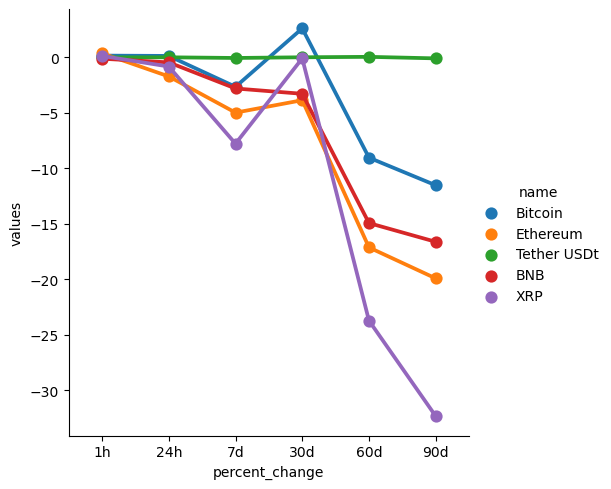

In [21]:
sns.catplot(x='percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [22]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8.query("name == 'Bitcoin'")
df8


,name,quote.USD.price,timestamp
0,Bitcoin,26743.57040,2023-10-12 21:04:44.820601+00:00
1,Ethereum,1536.06268,2023-10-12 21:04:44.820601+00:00
2,Tether USDt,0.99964,2023-10-12 21:04:44.820601+00:00
3,BNB,205.08341,2023-10-12 21:04:44.820601+00:00
4,XRP,0.48217,2023-10-12 21:04:44.820601+00:00
5,Bitcoin,26743.57040,2023-10-12 21:04:45.117147+00:00
6,Ethereum,1536.06268,2023-10-12 21:04:45.117147+00:00
7,Tether USDt,0.99964,2023-10-12 21:04:45.117147+00:00
8,BNB,205.08341,2023-10-12 21:04:45.117147+00:00
9,XRP,0.48217,2023-10-12 21:04:45.117147+00:00


In [1]:
#sns.set_theme(style = "darkgrid")

#sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df8)